# 1.BC 데이터 초콜릿 평가 예측.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
url = './AI_05_허성호(데이터파일)/flavor_of_chocolate.csv'
url2 = './AI_05_허성호(데이터파일)/chocolate2.csv'
df = pd.read_csv(url)
df2 = pd.read_csv(url2)

In [4]:
df

,Unnamed: 0,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [3]:
df2

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,2219,1205,Zotter,Austria,2014,Blend,Raw,80.0,2.75,4,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN
2220,2220,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN
2221,2221,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN
2222,2222,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN


In [4]:
df

,Unnamed: 0,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


### 2.두개의 데이터를 합치기 전에 df의 Cocoa Percent를 %부분을 빼줘서 맞춰줍니다.

In [5]:
df['Cocoa Percent']

0       63%
1       70%
2       70%
3       70%
4       70%
       ... 
1790    70%
1791    65%
1792    65%
1793    62%
1794    65%
Name: Cocoa Percent, Length: 1795, dtype: object

In [6]:
df['Cocoa Percent']=df['Cocoa Percent'].str.replace(pat=r'%', repl= r'', regex=True) # 정규표현식 사용해서 %문자를 없애줌.
df['Cocoa Percent'].unique()# 제거에 성공.

array(['63', '70', '60', '80', '88', '72', '55', '75', '65', '85', '73',
       '64', '66', '68', '50', '100', '77', '90', '71', '83', '78', '74',
       '76', '86', '82', '69', '91', '42', '61', '73.5', '62', '67', '58',
       '60.5', '79', '81', '57', '72.5', '56', '46', '89', '99', '84',
       '53', '87'], dtype=object)

### 3.두개의 데이터를 합치기전에 Columns명과 공통적으로 학습하는데 불필요한 Column을 뺴야합니다.
- 먼저 Column명 변경전에 Unnamed: 0라는 컬럼먼저 제외 시키고 진행하겠습니다.

In [7]:
def remove_column(data):
    data.drop(['Unnamed: 0'],axis=1,inplace=True)
    return data

In [8]:
remove_column(df)
remove_column(df2)

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,1205,Zotter,Austria,2014,Blend,Raw,80.0,2.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN
2220,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN
2221,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN
2222,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN


In [9]:
#먼저 df의 column명을 변경하겠습니다.df2에맞춰서 변경을 하겠습니다.
re_name = ['company','specific_bean_origin_or_bar_name','ref','review_date',
          'cocoa_percent','company_location','rating','Bean_Type','country_of_bean_origin']
df.columns = re_name

In [10]:
df

,company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,Bean_Type,country_of_bean_origin
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62,Austria,3.25,,India


In [11]:
#이어서 불필요한 회사고유번호인 ref를 빼겠습니다.
def remove_column2(data):
    data.drop(['ref'],axis=1,inplace=True)
    return data

In [12]:
#확인
remove_column2(df)
remove_column2(df2)

,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,Zotter,Austria,2014,Blend,Raw,80.0,2.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN
2220,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN
2221,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN
2222,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN


In [13]:
df#확인

,company,specific_bean_origin_or_bar_name,review_date,cocoa_percent,company_location,rating,Bean_Type,country_of_bean_origin
0,A. Morin,Agua Grande,2016,63,France,3.75,,Sao Tome
1,A. Morin,Kpime,2015,70,France,2.75,,Togo
2,A. Morin,Atsane,2015,70,France,3.00,,Togo
3,A. Morin,Akata,2015,70,France,3.50,,Togo
4,A. Morin,Quilla,2015,70,France,3.50,,Peru
...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,2011,70,Austria,3.75,,Peru
1791,Zotter,Congo,2011,65,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,2011,65,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,2011,62,Austria,3.25,,India


In [14]:
#이상없으므로 이제 데이터를 합치겠습니다.먼저 합칠때 merge로 일단 합쳐보겠습니다.
#df3= pd.merge(df,df2,on='company',how='outer')
#df3#잘 합쳐진듯합니다.
#결측치 확인
#df3.isnull().sum()#음... 다시 합쳐야할듯합니다. 이상하게 됐습니다.
#merge를 df를 기준으로 합치겠습니다.
#df4 = pd.merge(df,df2,on='company',how='left')
#df4
#concat으로 이어붙여서 하는게 정답이였던것같습니다.

In [15]:
df3 = pd.concat([df,df2],axis=0,ignore_index=True)
df3

,company,specific_bean_origin_or_bar_name,review_date,cocoa_percent,company_location,rating,Bean_Type,country_of_bean_origin,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,A. Morin,Agua Grande,2016,63,France,3.75,,Sao Tome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A. Morin,Kpime,2015,70,France,2.75,,Togo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A. Morin,Atsane,2015,70,France,3.00,,Togo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A. Morin,Akata,2015,70,France,3.50,,Togo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A. Morin,Quilla,2015,70,France,3.50,,Peru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,Zotter,Raw,2014,80.0,Austria,2.75,NaN,Blend,4.0,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN
4015,Zotter,"APROCAFA, Acandi",2017,75.0,Austria,3.75,NaN,Colombia,3.0,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN
4016,Zotter,Maya Mtn,2018,72.0,Austria,3.50,NaN,Belize,3.0,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN
4017,Zotter,Mountains of the Moon,2018,70.0,Austria,3.25,NaN,Congo,3.0,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN


In [16]:
df3.isnull().sum()

company                                0
specific_bean_origin_or_bar_name       0
review_date                            0
cocoa_percent                          0
company_location                       0
rating                                 0
Bean_Type                           2225
country_of_bean_origin                 1
counts_of_ingredients               1795
beans                               1795
cocoa_butter                        1795
vanilla                             1795
lecithin                            1795
salt                                1795
sugar                               1795
sweetener_without_sugar             1795
first_taste                         1795
second_taste                        1872
third_taste                         2415
fourth_taste                        3777
dtype: int64

### 현재 데이터 전처리전에 분석할수있는 사람들이 선호하는 초콜릿 회사를 분석해보겠습니다.

In [17]:
df3

,company,specific_bean_origin_or_bar_name,review_date,cocoa_percent,company_location,rating,Bean_Type,country_of_bean_origin,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,A. Morin,Agua Grande,2016,63,France,3.75,,Sao Tome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A. Morin,Kpime,2015,70,France,2.75,,Togo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A. Morin,Atsane,2015,70,France,3.00,,Togo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A. Morin,Akata,2015,70,France,3.50,,Togo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A. Morin,Quilla,2015,70,France,3.50,,Peru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,Zotter,Raw,2014,80.0,Austria,2.75,NaN,Blend,4.0,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN
4015,Zotter,"APROCAFA, Acandi",2017,75.0,Austria,3.75,NaN,Colombia,3.0,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN
4016,Zotter,Maya Mtn,2018,72.0,Austria,3.50,NaN,Belize,3.0,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN
4017,Zotter,Mountains of the Moon,2018,70.0,Austria,3.25,NaN,Congo,3.0,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN


In [18]:
df3['company_location'].value_counts()#?국가가 많은것을 비교하려고보니
#U.S.A가 이상합니다. 일단 나중에 불필요한 특수문자나 잘못명시된 행들을  정리해야할듯합니다.

U.S.A                    948
U.S.A.                   764
France                   323
Canada                   283
Italy                    130
                        ... 
Wales                      2
Eucador                    1
Niacragua                  1
Czech Republic             1
St.vincent-grenadines      1
Name: company_location, Length: 80, dtype: int64

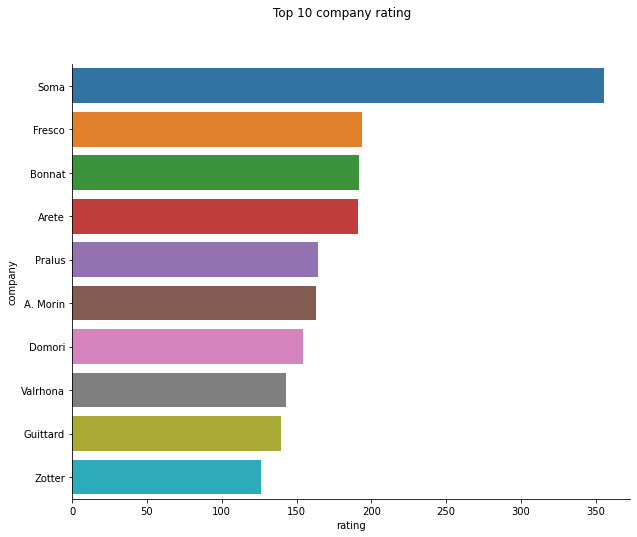

In [20]:
#시각화 
#초콜릿 회사별 선호도순위
fig, ax = plt.subplots(figsize=(10,8))

choco_company = df3[['company', 'rating',]].copy()

company = choco_company[['company', 'rating']]
company_group = company.groupby('company').sum()
company_group.sort_values(by=['rating'], ascending=False, inplace=True)
sns.barplot(ax=ax, x='rating', y=company_group.index[0:10], data=company_group[0:10])
ax.set_xlabel('rating')
ax.set_ylabel('company')

plt.suptitle('Top 10 company rating')
plt.subplots_adjust(hspace=0.3)
sns.despine(left=False, bottom=False)

### 사람들에게 좋은평인 초콜릿회사는 Soma라는 회사였습니다. 제 예상가설과는 다른 결과였습니다. 학습전의 결과이니 확실하진않습니다

### 4.이제 선형회귀 모델을 기준모델로 삼아서 학습을 진행하겠습니다. 그후 전처리 진행

In [21]:
feature_drop ='rating'
X = df3.drop(feature_drop, axis=1).copy()
y = df3.rating

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=2)

In [23]:
x_train.shape,x_test.shape

((3014, 19), (1005, 19))

In [24]:
# 파이프라인을 만들어서 학습
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    LinearRegression()
)

pipe.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['company',
                                      'specific_bean_origin_or_bar_name',
                                      'cocoa_percent', 'company_location',
                                      'Bean_Type', 'country_of_bean_origin',
                                      'beans', 'cocoa_butter', 'vanilla',
                                      'lecithin', 'salt', 'sugar',
                                      'sweetener_without_sugar', 'first_taste',
                                      'second_taste', 'third_taste',
                                      'fourth_taste'],
                                mapping=[{'col': 'company',
                                          'data_ty...
spicey              2
roasty              3
mint                4
earthy              5
                 ... 
intense bitter    283
mild sour         284
gentle roast      285
melon like        286
off fatty note    287
Length: 287

In [25]:
print('훈련세트 ',pipe.score(x_train, y_train))
print('테스트세트 : ',pipe.score(x_test, y_test))
#그다지 훈련이 잘된것같지않습니다.

훈련세트  0.07408872018266055
테스트세트 :  0.0324444399388496


### 5.학습 성능을 높이기위해서 전처리를 진행하겠습니다.

In [26]:
df3.dtypes
#counts_of_ingredients~fourth_taste column까지 학습에 사용하게될경우 이상치가 많아질수가 있어서
#빼야할듯합니다.

company                              object
specific_bean_origin_or_bar_name     object
review_date                           int64
cocoa_percent                        object
company_location                     object
rating                              float64
Bean_Type                            object
country_of_bean_origin               object
counts_of_ingredients               float64
beans                                object
cocoa_butter                         object
vanilla                              object
lecithin                             object
salt                                 object
sugar                                object
sweetener_without_sugar              object
first_taste                          object
second_taste                         object
third_taste                          object
fourth_taste                         object
dtype: object

In [27]:
df4 = df3.iloc[:,0:8]#사용할 컬럼만 가져옵니다.
df4.columns

Index(['company', 'specific_bean_origin_or_bar_name', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'Bean_Type',
       'country_of_bean_origin'],
      dtype='object')

In [28]:
#결측치 확인
df4.isnull().sum() 

company                                0
specific_bean_origin_or_bar_name       0
review_date                            0
cocoa_percent                          0
company_location                       0
rating                                 0
Bean_Type                           2225
country_of_bean_origin                 1
dtype: int64

In [29]:
df4.Bean_Type #코코아의 콩은 해당 타입의 갯수가 많으면 따로 column으로 만들어야할듯합니다.

0          
1          
2          
3          
4          
       ... 
4014    NaN
4015    NaN
4016    NaN
4017    NaN
4018    NaN
Name: Bean_Type, Length: 4019, dtype: object

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


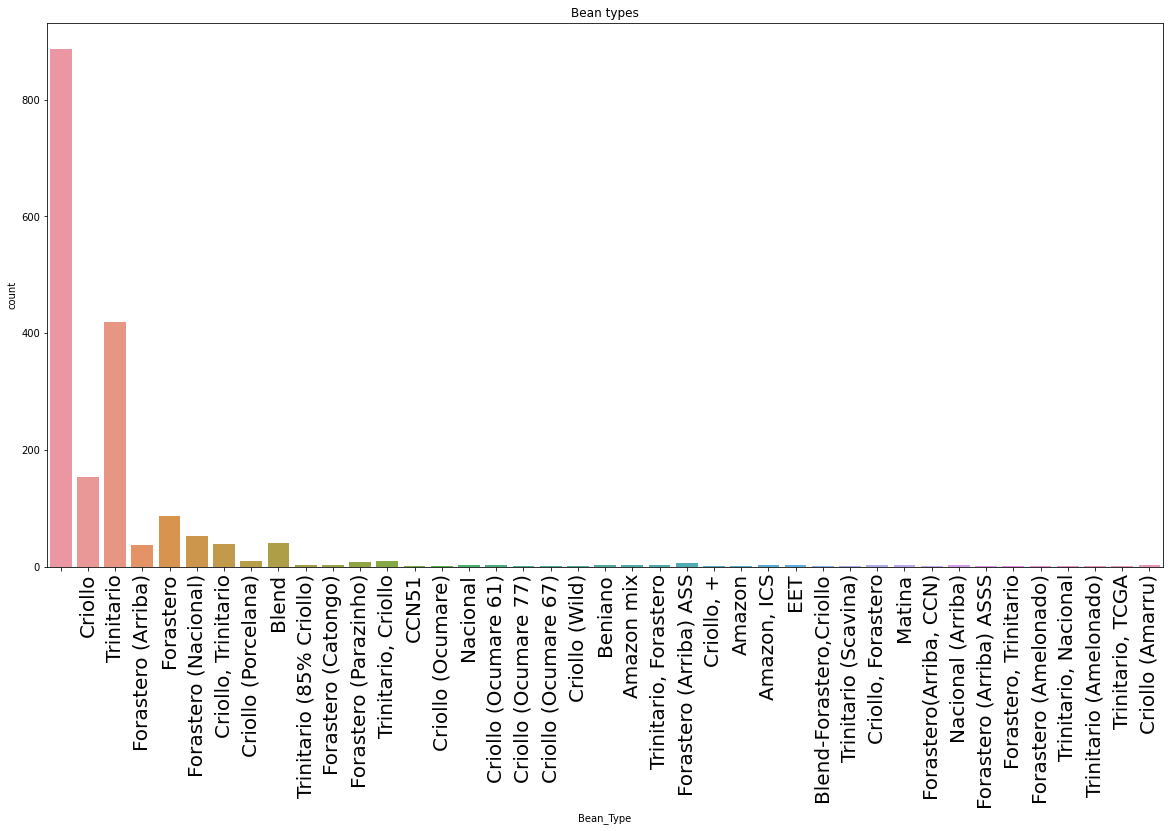

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(df4.Bean_Type)
plt.xticks(fontsize=20,rotation=90);
plt.title("Bean types");

In [31]:
df4['Bean_Type']

0          
1          
2          
3          
4          
       ... 
4014    NaN
4015    NaN
4016    NaN
4017    NaN
4018    NaN
Name: Bean_Type, Length: 4019, dtype: object

In [32]:
import numpy as np
#Bean_Type은 비어있는 값이 너무많아서 학습시에 잘안될듯합니다. nan으로라도 채워주겠습니다.
empty = df4['Bean_Type'].values[0]#0번째 행값이 비어있는 값이므로
def turn_to_nan(data):
    if data == empty:
        return np.nan
    else:
        return data
for i in df4.columns:
    if df4[i].dtype == 'O':
        df4[i] = df4[i].apply(lambda data: turn_to_nan(data))

In [33]:
df4

,company,specific_bean_origin_or_bar_name,review_date,cocoa_percent,company_location,rating,Bean_Type,country_of_bean_origin
0,A. Morin,Agua Grande,2016,63,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,2015,70,France,2.75,NaN,Togo
2,A. Morin,Atsane,2015,70,France,3.00,NaN,Togo
3,A. Morin,Akata,2015,70,France,3.50,NaN,Togo
4,A. Morin,Quilla,2015,70,France,3.50,NaN,Peru
...,...,...,...,...,...,...,...,...
4014,Zotter,Raw,2014,80.0,Austria,2.75,NaN,Blend
4015,Zotter,"APROCAFA, Acandi",2017,75.0,Austria,3.75,NaN,Colombia
4016,Zotter,Maya Mtn,2018,72.0,Austria,3.50,NaN,Belize
4017,Zotter,Mountains of the Moon,2018,70.0,Austria,3.25,NaN,Congo


In [34]:
#빈도수가 많은 코코아 콩들만 사용하겠습니다. Trinitario,Criollo,Blend,Forastero
def check_bean(bean, name):
    bean = bean.lower()
    if name in bean:
        return bean
    return 0
df4['trinitario_bean'] = df4['Bean_Type'].dropna().apply(lambda bean: check_bean(bean,'trinitario'))#이제 대문자로 표시되어있던 Trinitario를 소문자로 바꾼뒤 새로운 열에 특정 코코아콩 데이터 넣음.
df4['criollo_bean'] = df4['Bean_Type'].dropna().apply(lambda bean: check_bean(bean,'criollo'))
df4['blend_bean'] = df4['Bean_Type'].dropna().apply(lambda bean: check_bean(bean,'blend'))
df4['forastero_bean'] = df4['Bean_Type'].dropna().apply(lambda bean: check_bean(bean,'forastero'))

In [35]:
df4

,company,specific_bean_origin_or_bar_name,review_date,cocoa_percent,company_location,rating,Bean_Type,country_of_bean_origin,trinitario_bean,criollo_bean,blend_bean,forastero_bean
0,A. Morin,Agua Grande,2016,63,France,3.75,NaN,Sao Tome,NaN,NaN,NaN,NaN
1,A. Morin,Kpime,2015,70,France,2.75,NaN,Togo,NaN,NaN,NaN,NaN
2,A. Morin,Atsane,2015,70,France,3.00,NaN,Togo,NaN,NaN,NaN,NaN
3,A. Morin,Akata,2015,70,France,3.50,NaN,Togo,NaN,NaN,NaN,NaN
4,A. Morin,Quilla,2015,70,France,3.50,NaN,Peru,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4014,Zotter,Raw,2014,80.0,Austria,2.75,NaN,Blend,NaN,NaN,NaN,NaN
4015,Zotter,"APROCAFA, Acandi",2017,75.0,Austria,3.75,NaN,Colombia,NaN,NaN,NaN,NaN
4016,Zotter,Maya Mtn,2018,72.0,Austria,3.50,NaN,Belize,NaN,NaN,NaN,NaN
4017,Zotter,Mountains of the Moon,2018,70.0,Austria,3.25,NaN,Congo,NaN,NaN,NaN,NaN


### 6.이제 rating의 분포를 한번 살펴 보겠습니다.

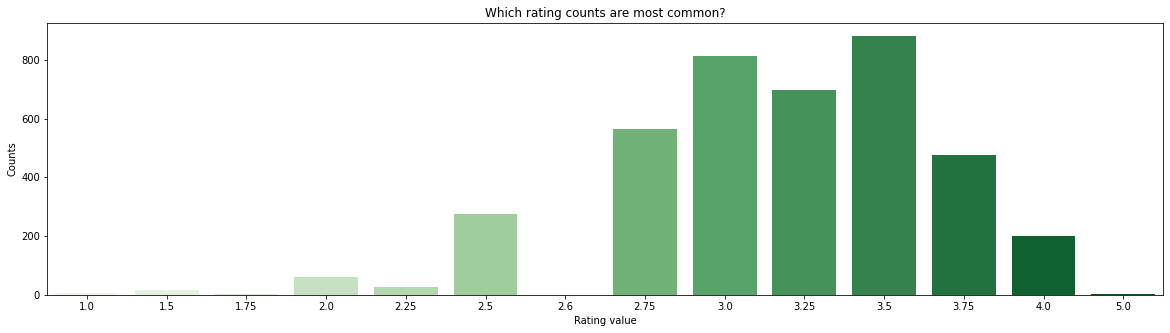

In [36]:
rating_counts = df4['rating'].value_counts()

plt.figure(figsize=(20,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Greens")
plt.xlabel("Rating value")
plt.ylabel("Counts")
plt.title("Which rating counts are most common?");

### rating을 살펴보았는데 너무 2.75 ~ 3.75사이에 쏠려있어서 점수를 간단하게 1~5점으로 나눠줘야할듯합니다.

In [37]:
#ratingdp 문자열이 섞여있을수도있어서 pd.to_numeric진행.
df4['rating'] = df4['rating'].apply(pd.to_numeric)

In [38]:
#함수로 만들어서 진행
def re_rating(value):
    if value <2:
        return 1
    elif 2< value<=2.5:
        return 2
    elif 2.5 <value <=3:
        return 3
    elif 3 < value <=3.5:
        return 4
    elif 3.5 <value <=3.75:
        return 5
    else:
        return 6

In [39]:
df4['new_rating'] = df4['rating'].apply(lambda value:re_rating(value))

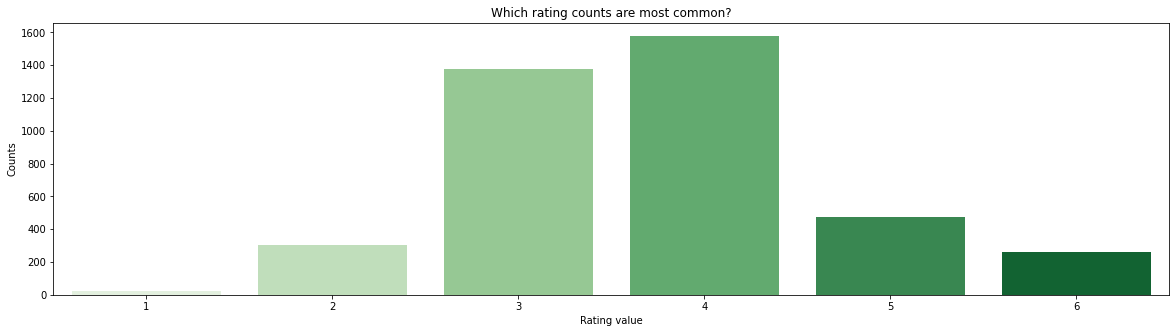

In [40]:
rating_counts = df4['new_rating'].value_counts()

plt.figure(figsize=(20,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Greens")
plt.xlabel("Rating value")
plt.ylabel("Counts")
plt.title("Which rating counts are most common?");
#새롭게 만든게 더 간결하게 된듯합니다. 한쪽에 쏠리지않고

### 7.이제 comapny_location을 위에서 확인을 했었는데 이름이 이상하게 되어있는 경우가 있어서 살펴보겠습니다.

In [41]:
df4['company_location'].unique()

array(['France', 'U.S.A.', 'Fiji', 'Ecuador', 'Mexico', 'Switzerland',
       'Netherlands', 'Spain', 'Peru', 'Canada', 'Italy', 'Brazil',
       'U.K.', 'Australia', 'Wales', 'Belgium', 'Germany', 'Russia',
       'Puerto Rico', 'Venezuela', 'Colombia', 'Japan', 'New Zealand',
       'Costa Rica', 'South Korea', 'Amsterdam', 'Scotland', 'Martinique',
       'Sao Tome', 'Argentina', 'Guatemala', 'South Africa', 'Bolivia',
       'St. Lucia', 'Portugal', 'Singapore', 'Denmark', 'Vietnam',
       'Grenada', 'Israel', 'India', 'Czech Republic',
       'Domincan Republic', 'Finland', 'Madagascar', 'Philippines',
       'Sweden', 'Poland', 'Austria', 'Honduras', 'Nicaragua',
       'Lithuania', 'Niacragua', 'Chile', 'Ghana', 'Iceland', 'Eucador',
       'Hungary', 'Suriname', 'Ireland', 'U.S.A', 'Vanuatu', 'U.k.',
       'Malaysia', 'South korea', 'Taiwan', 'Puerto rico', 'New zealand',
       'Costa rica', 'Sao tome', 'St. lucia', 'South africa',
       'Dominican republic', 'Sao tome & pr

In [42]:
def re_country(string):
    string = string.str.replace(pat=r'U.S.A.', repl= r'U.S.A', regex=True)
    string = string.str.replace(pat=r'Niacragua', repl= r'Nicaragua', regex=True)
    string = string.str.replace(pat=r'Eucador',repl=r'Ecuador',regex=True)
    string = string.str.replace(pat=r'U.k.',repl=r'U.K',regex=True)
    string = string.str.replace(pat=r'U.K.',repl=r'U.K',regex=True)
    string = string.str.replace(pat=r'South korea',repl=r'South Korea',regex=True)
    string = string.str.replace(pat=r'South africa',repl=r'South Africa',regex=True)
    string = string.str.replace(pat=r'Domincan Republic',repl=r'Dominican republic',regex=True)
    string = string.str.replace(pat=r'New zealand',repl=r'New Zealand',regex=True)
    string = string.str.replace(pat=r'St. lucia',repl=r'St. Lucia',regex=True)
    string = string.str.replace(pat=r'U.a.e.',repl=r'U.a.e',regex=True)
    return string


In [43]:
df4['company_location'] = re_country(df4['company_location'])
df4['company_location'].unique()#확인

array(['France', 'U.S.A', 'Fiji', 'Ecuador', 'Mexico', 'Switzerland',
       'Netherlands', 'Spain', 'Peru', 'Canada', 'Italy', 'Brazil', 'U.K',
       'Australia', 'Wales', 'Belgium', 'Germany', 'Russia',
       'Puerto Rico', 'Venezuela', 'Colombia', 'Japan', 'New Zealand',
       'Costa Rica', 'South Korea', 'Amsterdam', 'Scotland', 'Martinique',
       'Sao Tome', 'Argentina', 'Guatemala', 'South Africa', 'Bolivia',
       'St. Lucia', 'Portugal', 'Singapore', 'Denmark', 'Vietnam',
       'Grenada', 'Israel', 'India', 'Czech Republic',
       'Dominican republic', 'Finland', 'Madagascar', 'Philippines',
       'Sweden', 'Poland', 'Austria', 'Honduras', 'Nicaragua',
       'Lithuania', 'Chile', 'Ghana', 'Iceland', 'Hungary', 'Suriname',
       'Ireland', 'Vanuatu', 'Malaysia', 'Taiwan', 'Puerto rico',
       'Costa rica', 'Sao tome', 'Sao tome & principe', 'Norway',
       'St.vincent-grenadines', 'Czech republic', 'Thailand', 'U.a.e',
       'El salvador'], dtype=object)

### 확인한 결과 잘 된듯합니다.

In [44]:
df4.isnull().sum()

company                                0
specific_bean_origin_or_bar_name       0
review_date                            0
cocoa_percent                          0
company_location                       0
rating                                 0
Bean_Type                           3112
country_of_bean_origin                74
trinitario_bean                     3112
criollo_bean                        3112
blend_bean                          3112
forastero_bean                      3112
new_rating                             0
dtype: int64

In [45]:
# 원산지 나라의 코코아 콩이므로 country_of_bean_origin를 specific컬럼값으로 결측치 대체해줌.
df4['country_of_bean_origin'] = df4['country_of_bean_origin'].fillna(df4['specific_bean_origin_or_bar_name'])
df4['country_of_bean_origin'].isnull().value_counts()

False    4019
Name: country_of_bean_origin, dtype: int64

In [46]:
df4.isnull().sum()#나머지 결측치는 비어있는 값이며 저걸 없앤다면 학습 성능이 떨어질수도있기때문에 전처리는 여기까지 하겠습니다.

company                                0
specific_bean_origin_or_bar_name       0
review_date                            0
cocoa_percent                          0
company_location                       0
rating                                 0
Bean_Type                           3112
country_of_bean_origin                 0
trinitario_bean                     3112
criollo_bean                        3112
blend_bean                          3112
forastero_bean                      3112
new_rating                             0
dtype: int64

In [47]:
#object형 학습에 사용할 column들을 카테고리타입으로 바꿔줍니다.
#실수형으로 변경해야할 object타입도 바꿔줍니다.
#타겟이 float여서 에러가 학습할때 발생함 int형으로 변환 해줘야함.
df4['company'] =df4['company'].astype('category')
df4['country_of_bean_origin'] = df4['country_of_bean_origin'].astype('category')
df4['company_location'] = df4['company_location'].astype('category')
df4['cocoa_percent'] = df4['cocoa_percent'].astype(float)

In [48]:
df4['rating'] =df4['rating'].astype(int)
df4['rating']

0       3
1       2
2       3
3       3
4       3
       ..
4014    2
4015    3
4016    3
4017    3
4018    3
Name: rating, Length: 4019, dtype: int64

### 전처리를 마무리해서 2번째 모델링 파일에서 진행하도록 하겠습니다.

In [62]:
#csv파일 저장
#df4.to_csv('preparedata.csv', index=False, encoding='utf-8')